<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/6_Linear_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import seaborn as sns

Load in the penguin dataset

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Linear Regression Model

Import a library to help us create a linear regression model

In [ ]:
import statsmodels.formula.api as smf

* smf.ols() create a new linear regression model
* data: our dataframe of data
* formula: formula illustrating the regression that we want to run
* We always need to add .fit() after ols() -- this does the work of actually finding the best fit

**FORMULA**

Dependent variable ~ independent variable all as one string

In [ ]:
model = smf.ols(data=penguins, formula='flipper_length_mm ~ body_mass_g').fit()

We can get the summary output of the regression by running the `summary()` method on our model

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Mon, 14 Jul 2025   Prob (F-statistic):          4.37e-107
Time:                        18:08:17   Log-Likelihood:                -1145.5
No. Observations:                 342   AIC:                             2295.
Df Residuals:                     340   BIC:                             2303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     136.7296      1.997     68.473      0.000     132.802     140.657
body_mass_g     0.0153      0.000     32.722      0.000       0.014       0.016
==============================================================================
Omnibus:                       11.021   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.630
Skew:                          -0.447   Prob(JB):                      0.00298
Kurtosis:                       2.872   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared**: 75% of the variation in flipper length is explained by the linear relationship with body mass

342 data points

Intercept: 136.7 means that in the model, if the body mass was 0g then the predicted flipper length would be 136.7mm

Slope: 0.0153 means that in the model, for every 1g increase in body mass we would predict a 0.0153mm increase in flipper length

### Scatter plot

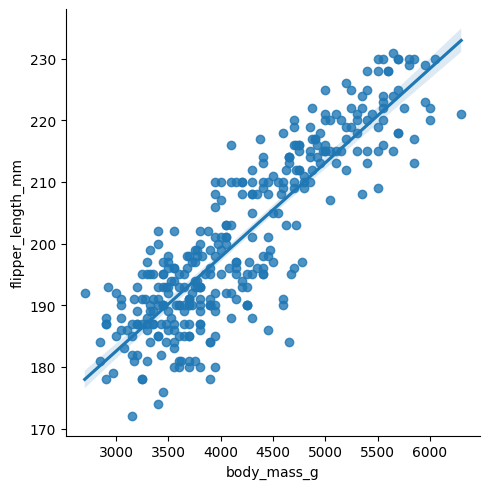

In [ ]:
sns.lmplot(data=penguins, x="body_mass_g", y="flipper_length_mm")

# Diagnostic Plots

Get some code that helps us make the diagnostic plots

In [ ]:
%pip install git+https://github.com/tb-harris/diagnostics.git

  Cloning https://github.com/tb-harris/diagnostics.git to /tmp/pip-req-build-_2zfhoni
  Running command git clone --filter=blob:none --quiet https://github.com/tb-harris/diagnostics.git /tmp/pip-req-build-_2zfhoni
  Resolved https://github.com/tb-harris/diagnostics.git to commit 63e7ed899813d387d104118e3b35d435b398c0df
  Preparing metadata (setup.py) ... done
  Created wheel for diagnostics: filename=diagnostics-0.1-py3-none-any.whl size=4726 sha256=d09f0f2b4c2d694c62dbebb1d57bd767b4d018a262552f2b8799e0aa6c1fff9d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ddoo57kq/wheels/dc/6f/7f/5d7dbbdace3319b3bc68e42a4691a9f8e3605e00b9f8b8ce2b
Successfully built diagnostics


In [ ]:
from diagnostics import LinearRegDiagnostic

Create a new object to handle creating the diagnostic plots for our model

In [ ]:
diag_plotter = LinearRegDiagnostic(model)

## Residual Plot

We would want to see only random noise and a horizontal line

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

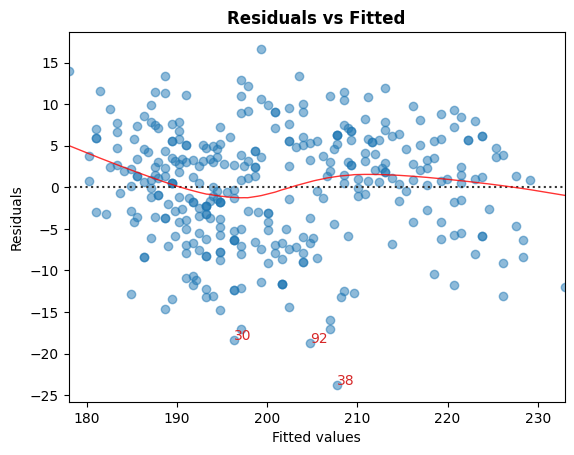

In [ ]:
diag_plotter.residual_plot()

* Fitted values: y predictions
* Biggest residuals are flagged
* Overall residual plot looks pretty good, line is fairly flat

## QQ Plot

We are looking for points to lie along a line

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

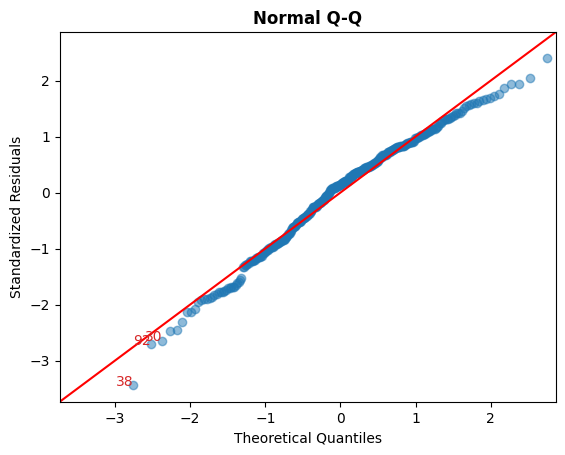

In [ ]:
diag_plotter.qq_plot()

Pretty good, but some deviations on the ends

## Scale Location Plot

Changes the scale of the residual plot

Looking for a relatively horizontal line.

<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

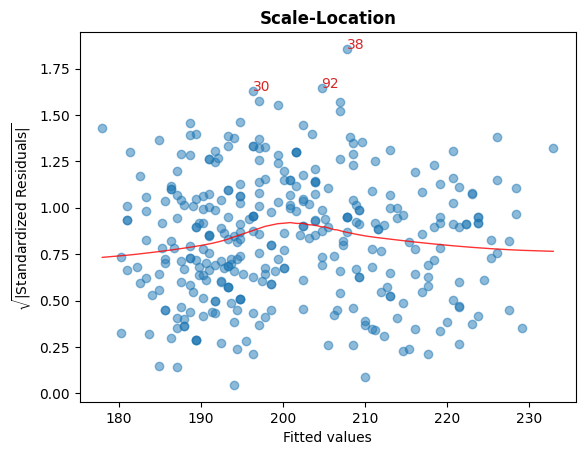

In [ ]:
diag_plotter.scale_location_plot()

We can see a fairly horizontal line and the pattern looks like just random noise -- good

# Leverage Plot

Looking for any influential points

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

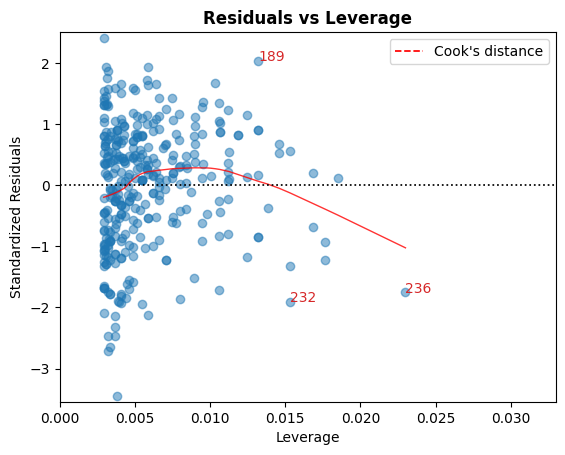

In [ ]:
diag_plotter.leverage_plot()

We don't see any points beyond the dotted line (we can't even see the dotted line because our points aren't that influential) so we don't have any very influential points.

## Conclusion based on diagnostic plots

The linear regression model seems to be a good fit because in the diagnostic plots we didn't see any issues or problems.

We will stick with a linear model because it's a simple model that fits the data well. No need to consider transformations or other options.

## Your task: choose a different combination of independent and dependent variables and run through this process. You can subset by species

In [ ]:
sns.lmplot(data=penguins[penguins['species']=='Gentoo'], x=)